# Preprocesamiento de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('../Datasets/countries.csv', sep=';')
df

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


informacion basica del df

In [2]:
print("filas y columnas",df.shape)
print("nombre columnas", df.columns)

filas y columnas (252, 19)
nombre columnas Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


Vamos con los valores nulls. Vamos a ver cuantos hay para cada categoria 

In [3]:
df.isnull().sum()

alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64

si teniamos 252 valores vemos que, eqivalent_fips_code lo podemos borrar ya que casi todos son valores nans. La variable postal_code_regex mas de lo mismo

vamos a ver que tipo es cada caracteristca

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

Para variables solo numericas tenemos esta:

In [5]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_2848/3331811242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


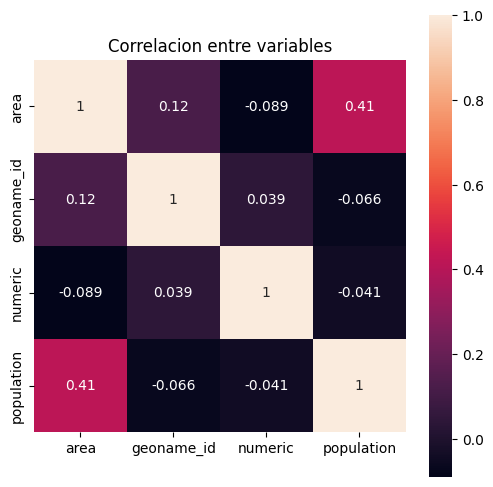

In [6]:
correlation = df.corr()
plt.figure(figsize=(6,6))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True)
plt.title("Correlacion entre variables")
plt.show()

# Cargamos el segundo dataset

In [7]:
df_pop = pd.read_csv('../Datasets/countries2.csv')
df_pop

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


Filtramos por un pais, por ejemplo espana

In [8]:
df_pop_es = df_pop[df_pop['country'] == 'Spain']
df_pop_es

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442


Ejemplo crecimiento del pais en los ultimos anos. Seleccionamos la poblacion y eliminamos el country ya que sabemos que es espana

<AxesSubplot: >

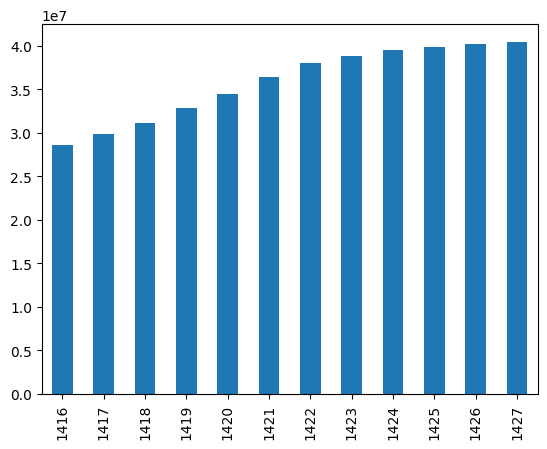

In [9]:
df_pop_es.drop(['country'], axis=1)['population'].plot(kind='bar')

# Comparativa entre dos paises
Comparamos entre espana y argentina y hacemos el plot

<AxesSubplot: >

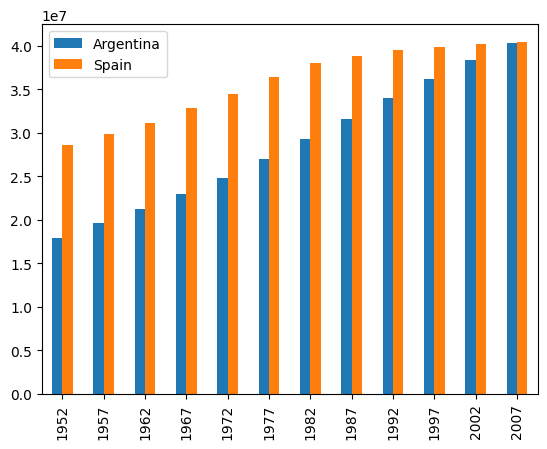

In [11]:
df_pop_ar = df_pop[df_pop['country'] == 'Argentina']
anios = df_pop_es['year'].unique()

# ahora ya tenemos lo que queremos
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

# nos cargamos un df para mostrarlo
df_plot = pd.DataFrame({'Argentina' : pop_ar, 'Spain' : pop_es }, index = anios)
df_plot.plot(kind='bar')

# Filtrado
Ahora filtramos por los paises hispano-hablantes

<AxesSubplot: xlabel='alpha_3'>

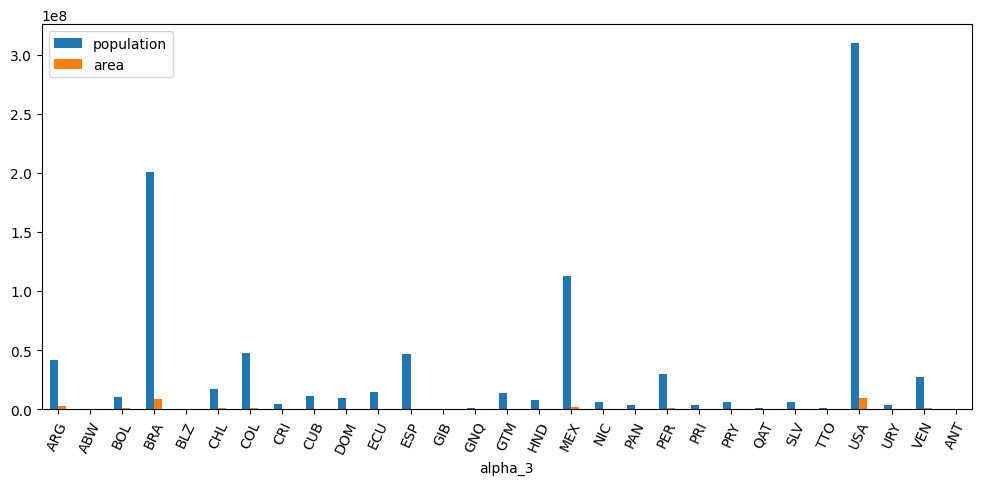

In [21]:
# Reemplazamos los valores nans a vacios para que no tengamos problemas
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol = df_espanol[df_espanol['languages'].str.contains('es')]
df_espanol.set_index('alpha_3')[['population', 'area']].plot(kind='bar', rot=65, figsize=(12, 5))


# Deteccion de outlayers

In [23]:
anomalies = []

def find_anomalies(data):
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)

    # Generate outlayers
    for index, row in data.iterrows():
        outlayer = row
        if (outlayer.iloc[0] > upper_limit.iloc[0]) or (outlayer.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])


population   -1.028727e+08
dtype: float64
population    1.675892e+08
dtype: float64


['BRA', 'USA']

Quitamos los registros, que sus respectivos indices son 30, 233

In [24]:
df_espanol.drop([30,233], inplace=True)

<AxesSubplot: xlabel='alpha_3'>

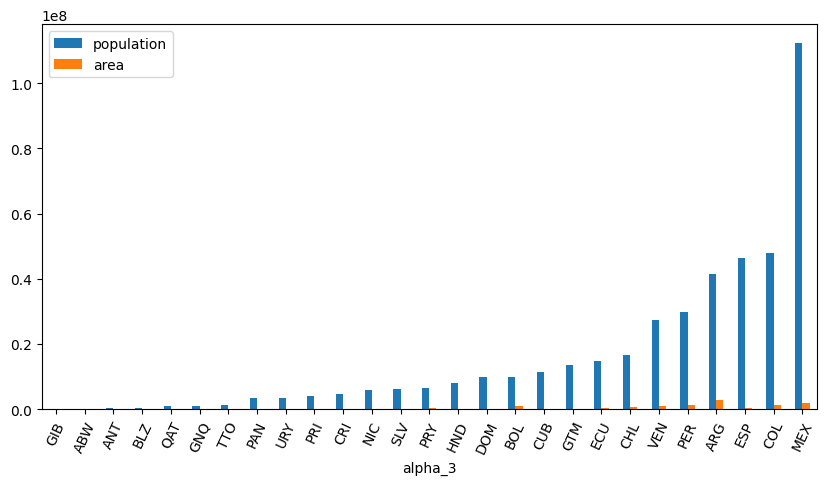

In [27]:
df_espanol.set_index('alpha_3')[['population', 'area']].sort_values(['population']).plot(kind='bar', rot=65, figsize=(10,5))

# Mejorando la visualizacion

In [31]:
df_2 = df_espanol.set_index('alpha_3')
df_2 = df_2[df_2['area'] > 1100]
df_2

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
ARG,AR,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
BOL,BO,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
BLZ,BZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
CHL,CL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
COL,CO,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
CRI,CR,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
CUB,CU,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
DOM,DO,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do
ECU,EC,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
